<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°04


## Problema 01

<img src="https://cdni.iconscout.com/illustration/free/thumb/free-sales-team-illustration-download-in-svg-png-gif-file-formats--business-pack-illustrations-1730192.png" width = "300" align="center"/>


El conjunto de datos, denominado `company_sales_data.csv`, recoge las ventas mensuales de distintos productos de una empresa, ofreciendo una visión general de las unidades vendidas y los beneficios generados. Entre los productos incluidos se encuentran cremas faciales, jabones de baño y artículos para el cuidado capilar. Este conjunto de datos es útil para analizar el rendimiento de ventas y el comportamiento del mercado a lo largo del tiempo.

### Descripción de los Datos:

1. **month_number**: Número correspondiente al mes del año (1 para enero, 2 para febrero, etc.).
2. **facecream**: Cantidad de unidades de crema facial vendidas durante el mes.
3. **facewash**: Cantidad de unidades de limpiador facial vendidas durante el mes.
4. **toothpaste**: Cantidad de unidades de pasta de dientes vendidas durante el mes.
5. **bathingsoap**: Cantidad de unidades de jabón de baño vendidas durante el mes.
6. **shampoo**: Cantidad de unidades de champú vendidas durante el mes.
7. **moisturizer**: Cantidad de unidades de crema hidratante vendidas durante el mes.
8. **total_units**: Total de unidades vendidas de todos los productos en un mes dado.
9. **total_profit**: Ganancia total obtenida por la venta de todos los productos durante el mes, expresada en la moneda correspondiente.



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,8)})

In [60]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2024/main/docs/labs/data/company_sales_data.csv")
df.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


El **objetivo principal** es extraer la mayor cantidad de información posible de este conjunto de datos. Para lograrlo, se deben abordar las siguientes tareas. Para cada pregunta, deberá obtener una conclusión basada en los gráficos generados. Al finalizar todas las preguntas, se espera una conclusión general del análisis.

> **Nota:** Se permite el uso de las librerías Matplotlib o Seaborn para la visualización y análisis de los datos.




1. Lea la columna **`total_profit`** correspondiente a todos los meses y represente los datos utilizando un gráfico lineal y un gráfico de dispersión.


In [11]:
#Dataframe
df_profit=df.groupby(['month_number'])['total_profit'].sum().reset_index()
df_profit.head()

,month_number,total_profit
0,1,211000
1,2,183300
2,3,224700
3,4,222700
4,5,209600


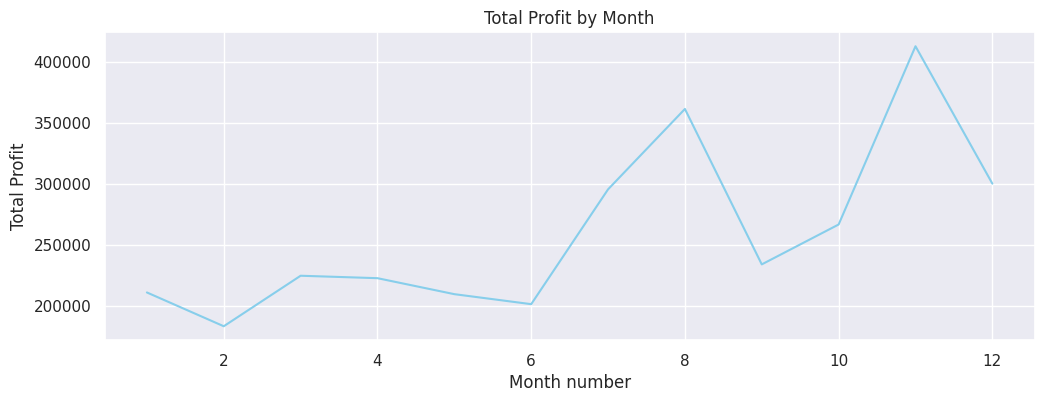

In [12]:
#Grafico lineal
plt.figure(figsize=(12, 4))  # Definir el tamaño de la figura
sns.lineplot(
    data = df_profit,
    x='month_number',
    y='total_profit',
    color = 'skyblue'
)

# Personalizar el gráfico
plt.xlabel('Month number')
plt.ylabel('Total Profit')
plt.title('Total Profit by Month')

# Mostrar el gráfico
plt.show()

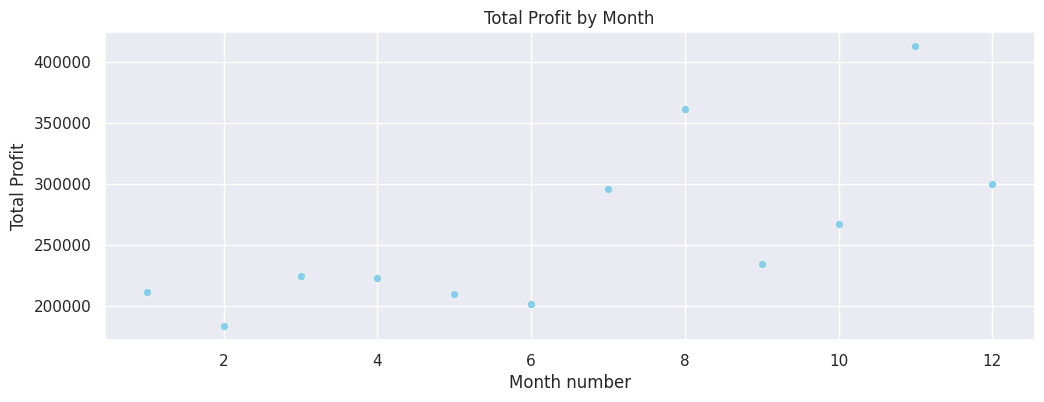

In [14]:
#Grafico de dispersion
plt.figure(figsize=(12, 4))  # Definir el tamaño de la figura
sns.scatterplot(
    data = df_profit,
    x='month_number',
    y='total_profit',
    color = 'skyblue'
)

# Personalizar el gráfico
plt.xlabel('Month number')
plt.ylabel('Total Profit')
plt.title('Total Profit by Month')

# Mostrar el gráfico
plt.show()

2. Lea los datos de ventas de todos los productos y represéntelos en un gráfico de líneas múltiples.


In [48]:
df_filter=df.drop(['total_units','total_profit'],axis=1)
df_sales=pd.melt(
    df_filter,
    id_vars='month_number',
    value_vars=['facecream','facewash','toothpaste','bathingsoap','shampoo','moisturizer'],
    var_name='product',
    value_name='quantity'
)
df_sales.head()

,month_number,product,quantity
0,1,facecream,2500
1,2,facecream,2630
2,3,facecream,2140
3,4,facecream,3400
4,5,facecream,3600


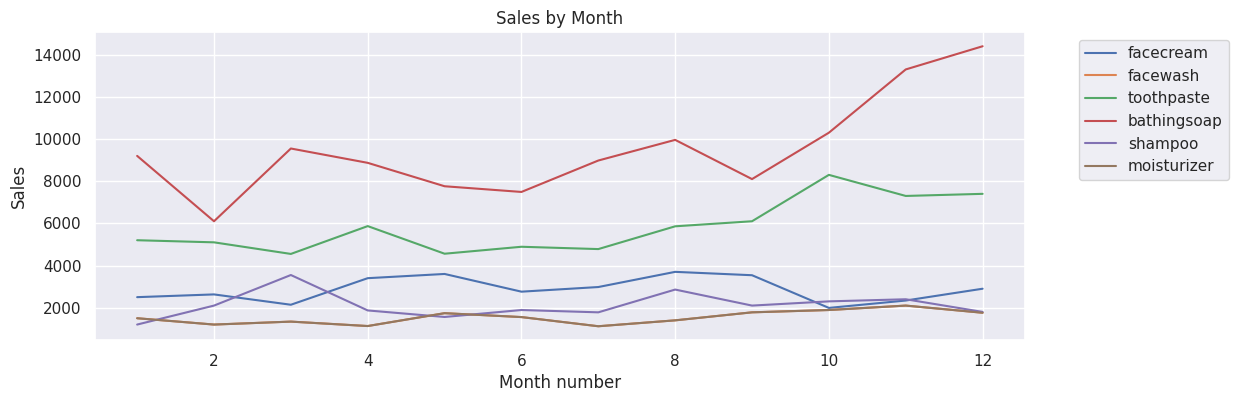

In [57]:
#Grafico de lineas multiple
plt.figure(figsize=(12, 4))  # Definir el tamaño de la figura
sns.lineplot(
    data = df_sales,
    x='month_number',
    y='quantity',
    hue='product'
)

# Personalizar el gráfico
plt.xlabel('Month number')
plt.ylabel('Sales')
plt.title('Sales by Month')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')

# Mostrar el gráfico
plt.show()

3. Lea los datos de ventas de **`facecream`** y **`facewash`** y represéntelos utilizando un gráfico de barras.

In [65]:
df_filter=df[['month_number','facecream','facewash']]
df_face=pd.melt(
    df_filter,
    id_vars='month_number',
    value_vars=['facecream','facewash'],
    var_name='product',
    value_name='quantity'
)
df_face.head()

,month_number,product,quantity
0,1,facecream,2500
1,2,facecream,2630
2,3,facecream,2140
3,4,facecream,3400
4,5,facecream,3600


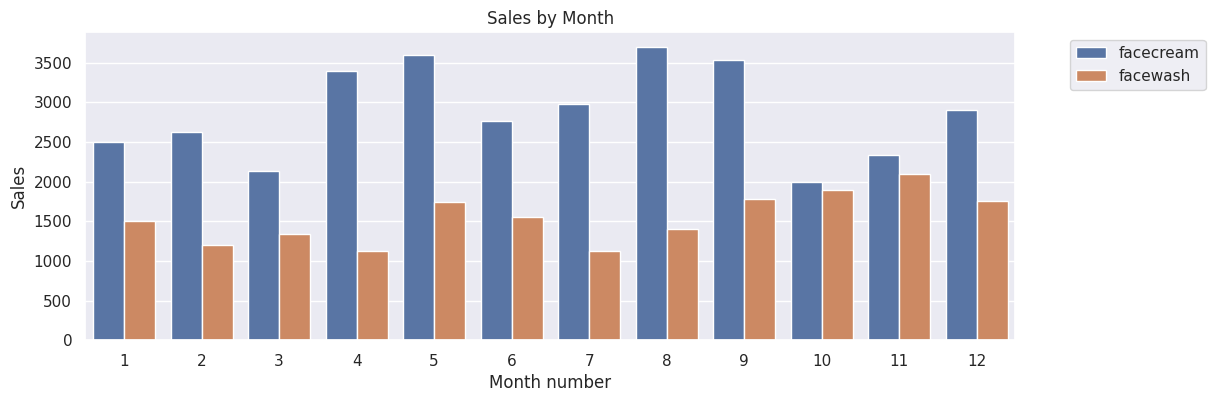

In [68]:
#Grafico de barras multiple
plt.figure(figsize=(12, 4))  # Definir el tamaño de la figura
sns.barplot(
    data = df_face,
    x='month_number',
    y='quantity',
    hue='product'
)

# Personalizar el gráfico
plt.xlabel('Month number')
plt.ylabel('Sales')
plt.title('Sales by Month')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')

# Mostrar el gráfico
plt.show()

4. Lea los datos de ventas de todos los productos y represéntelos utilizando un gráfico de caja (*box-plot*).


In [78]:
df_products=df.drop(['month_number','total_units','total_profit'],axis=1)
df_products.head()

,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer
0,2500,1500,5200,9200,1200,1500
1,2630,1200,5100,6100,2100,1200
2,2140,1340,4550,9550,3550,1340
3,3400,1130,5870,8870,1870,1130
4,3600,1740,4560,7760,1560,1740


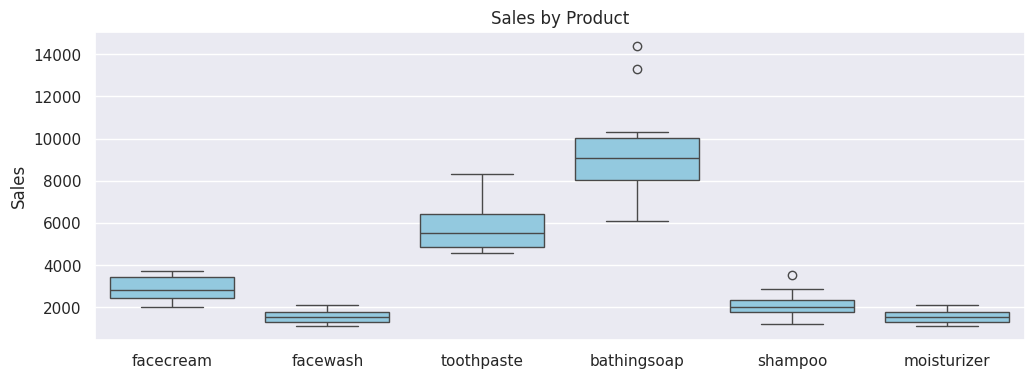

In [80]:
#Grafico de barras multiple
plt.figure(figsize=(12, 4))  # Definir el tamaño de la figura
sns.boxplot(
    data = df_products,
    color = 'skyblue'
)

# Personalizar el gráfico
plt.xlabel('')
plt.ylabel('Sales')
plt.title('Sales by Product')

# Mostrar el gráfico
plt.show()

5. Calcule las ventas totales del año pasado para cada producto y represéntelas utilizando un gráfico circular.

In [120]:
df_filter=df.drop(['total_units','total_profit'],axis=1)
df_product_sales=pd.melt(
    df_filter,
    id_vars='month_number',
    value_vars=['facecream','facewash','toothpaste','bathingsoap','shampoo','moisturizer'],
    var_name='product',
    value_name='quantity'
)
df_product_sales=df_product_sales.groupby('product').sum().drop('month_number',axis=1).reset_index()
df_product_sales.head()

,product,quantity
0,bathingsoap,114010
1,facecream,34480
2,facewash,18515
3,moisturizer,18515
4,shampoo,25410


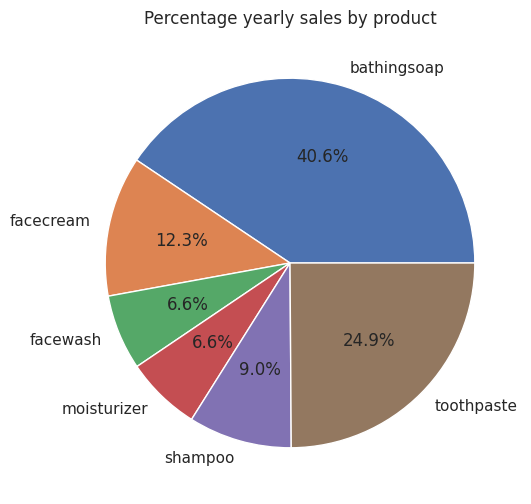

In [122]:
#Grafico circular
plt.figure(figsize=(6, 6))
plt.pie(
    df_product_sales['quantity'],
    labels=df_product_sales['product'],
    autopct='%1.1f%%',
)

plt.title('Percentage yearly sales by product')
# Mostrar el gráfico
plt.show()